In [2]:
pip install openai-clip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.4 MB/s eta 0:00:00
  Created wheel for openai-clip: filename=openai_clip-1.0.1-py3-none-any.whl size=1368605 sha256=6dd978d9dbcd9e8a32d0e539760a97b0adbc4d8c17643cd14e5672108a39354f
  Stored in directory: /root/.cache/pip/wheels/0d/17/90/042948fd2e2a87f1dcf6db6d438cad015c49db0c53d1d9c7dc
Successfully built openai-clip


In [3]:
pip install datasets

In [4]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 882.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [5]:
pip install tqdm

In [6]:
from datasets import load_dataset

ds = load_dataset('ceyda/fashion-products-small')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/151 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


dataset_infos.json: 0.00B [00:00, ?B/s]

data/train-00000-of-00002-357f4cbabe1a8e(…):   0%|          | 0.00/298M [00:00<?, ?B/s]

data/train-00001-of-00002-cbe936f1880f5e(…):   0%|          | 0.00/299M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/42700 [00:00<?, ? examples/s]

In [7]:
ds

DatasetDict({
    train: Dataset({
        features: ['filename', 'link', 'id', 'masterCategory', 'gender', 'subCategory', 'image'],
        num_rows: 42700
    })
})

In [8]:
entry = ds['train'][60]
entry

{'filename': '42841.jpg',
 'link': 'http://assets.myntassets.com/v1/images/style/properties/97d3bb4a71c9f7da88305ce9144d8576_images.jpg',
 'id': '42841',
 'masterCategory': 'Accessories',
 'gender': 'Women',
 'subCategory': 'Bags',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x512>}

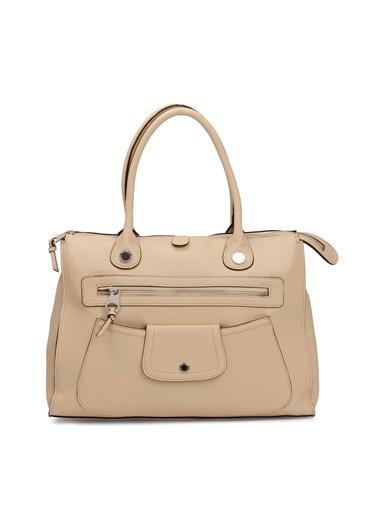

In [9]:
image = entry['image']
image

In [10]:
dataset = ds['train']

In [11]:
import clip
import torch

model, preprocess = clip.load("ViT-B/32", jit=False)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

100%|███████████████████████████████████████| 338M/338M [00:15<00:00, 23.4MiB/s]


CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          

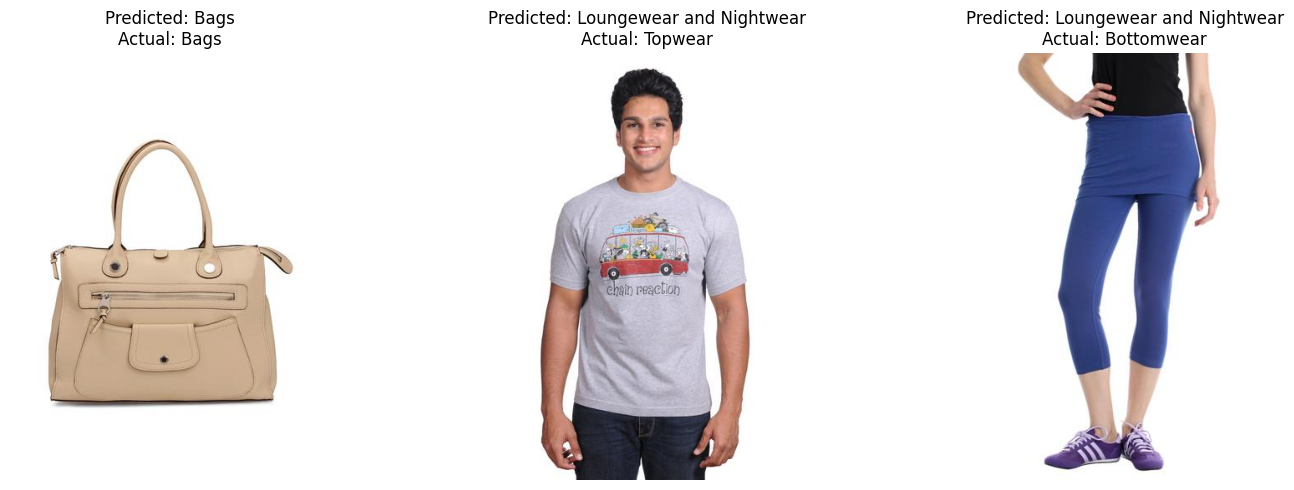

In [12]:
import matplotlib.pyplot as plt

indices = [60, 5, 95]

subcategories = list(set(example['subCategory'] for example in dataset))

text_inputs = torch.cat([clip.tokenize(f"a photo of {c}") for c in subcategories]).to(device)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, idx in enumerate(indices):

    example = dataset[idx]
    image = example['image']
    subcategory = example['subCategory']

    image_input = preprocess(image).unsqueeze(0).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_inputs)

    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    values, indices = similarity[0].topk(1)

    axes[i].imshow(image)
    axes[i].set_title(f"Predicted: {subcategories[indices[0]]}\nActual: {subcategory}")

    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [13]:
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [14]:
from torchvision import transforms
from torch.utils.data import Dataset

class FashionDataset(Dataset):
    def __init__(self, data):
        self.data = data
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        image = item['image']
        subcategory = item['subCategory']
        label = subcategories.index(subcategory)

        return self.transform(image), label

In [15]:
from torch.utils.data import DataLoader

train_loader = DataLoader(FashionDataset(train_dataset), batch_size=32, shuffle=True)
val_loader = DataLoader(FashionDataset(val_dataset), batch_size=32, shuffle=False)

In [16]:
import torch.nn as nn

class CLIPFineTuner(nn.Module):
    def __init__(self, model, num_classes):
        super(CLIPFineTuner, self).__init__()
        self.model = model
        self.classifier = nn.Linear(model.visual.output_dim, num_classes)

    def forward(self, x):
        with torch.no_grad():
            features = self.model.encode_image(x).float()
        return self.classifier(features)

In [17]:
num_classes = len(subcategories)
model_ft = CLIPFineTuner(model, num_classes).to(device)

In [18]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ft.classifier.parameters(), lr=1e-4)

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
from tqdm import tqdm

num_epochs = 5

for epoch in range(num_epochs):
    model_ft.train()
    running_loss = 0.0
    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}, Loss: 0.0000")

    for images, labels in pbar:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_ft(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        pbar.set_description(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

    # Validation
    model_ft.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_ft(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Validation Accuracy: {100 * correct / total}%')

torch.save(model_ft.state_dict(), '/content/drive/MyDrive/AI/Cumputer_Vision/Fine Tuning/CLIP/clip_finetuned.pth')

Epoch 1/5, Loss: 1.5451: 100%|██████████| 1068/1068 [03:03<00:00,  5.81it/s]


Epoch [1/5], Loss: 1.5451
Validation Accuracy: 85.10538641686183%


Epoch 2/5, Loss: 0.5751: 100%|██████████| 1068/1068 [03:04<00:00,  5.78it/s]


Epoch [2/5], Loss: 0.5751
Validation Accuracy: 90.32786885245902%


Epoch 3/5, Loss: 0.3797: 100%|██████████| 1068/1068 [03:04<00:00,  5.78it/s]


Epoch [3/5], Loss: 0.3797
Validation Accuracy: 91.97892271662764%


Epoch 4/5, Loss: 0.2988: 100%|██████████| 1068/1068 [03:04<00:00,  5.79it/s]


Epoch [4/5], Loss: 0.2988
Validation Accuracy: 92.84543325526933%


Epoch 5/5, Loss: 0.2552: 100%|██████████| 1068/1068 [03:03<00:00,  5.83it/s]


Epoch [5/5], Loss: 0.2552
Validation Accuracy: 93.51288056206089%


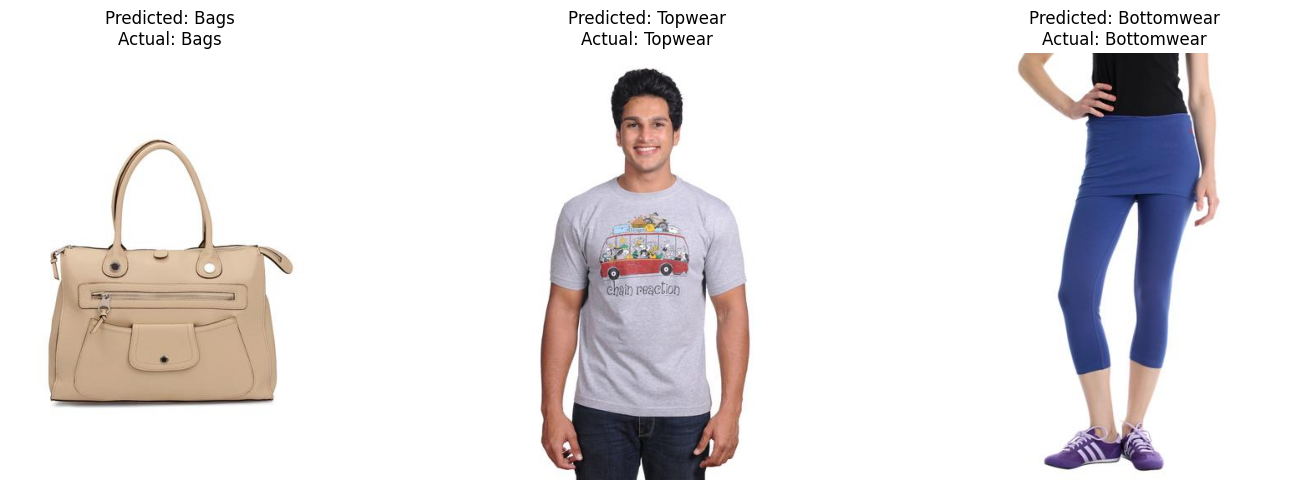

In [21]:
import matplotlib.pyplot as plt
import torch
from torchvision import transforms

model_ft.load_state_dict(torch.load('/content/drive/MyDrive/AI/Cumputer_Vision/Fine Tuning/CLIP/clip_finetuned.pth'))
model_ft.eval()

indices = [60, 5, 95]

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, idx in enumerate(indices):

    example = dataset[idx]
    image = example['image']
    subcategory = example['subCategory']

    image_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model_ft(image_tensor)
        _, predicted_label_idx = torch.max(output, 1)
        predicted_label = subcategories[predicted_label_idx.item()]


    axes[i].imshow(image)
    axes[i].set_title(f"Predicted: {predicted_label}\nActual: {subcategory}")

    axes[i].axis('off')

plt.tight_layout()
plt.show()